<center>
<p>
<center>
Universidade Federal de Minas Gerais <br/>
Introdução à Programação de Computadores <br/>
2022/2
</center>
</p>								
<h1><b>Projeto Prático Final</b></h1>
<b>Total: 15 pontos</b>
</center>		

<br/>
<p>
<h4><b>Professores:</b></h4>
<ul>
    <li>Adriano César Machado Pereira</li>
    <li>George Luiz Medeiros Teodoro</li>
    <li>João Guilherme Maia de Menezes</li>
</ul>	

In [2]:
#@markdown ####**Aluno** {run: "auto"}
Nome = "" #@param {type:"string"}
Matrícula = "" #@param {type:"string"}

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados sobre economia mineral no Brasil gerados pela Agência Nacional de Mineração. Os dados utilizados estão disponíveis em [https://www.gov.br/anm](https://www.gov.br/anm/pt-br)

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Nas duas células abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.

**OBS1: Execute as duas células abaixo**

**OBS2: O arquivo é grande, então pode demorar para realizar o download (cerca de 10 minutos)**


In [6]:
import requests

URL = 'https://app.anm.gov.br/DadosAbertos/ARRECADACAO/CFEM_Arrecadacao.csv'
r = requests.get(URL, allow_redirects=True)
file_name = URL.split('/')[-1]
with open(file_name, 'wb') as f:
    f.write(r.content)

In [11]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    with open(filename, 'r', encoding='ISO-8859-1') as file:
    
        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes: 
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
            dados[-1][-3] = dados[-1][-3].replace(',','.')
            dados[-1][-1] = dados[-1][-1].replace(',','.')
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("CFEM_Arrecadacao.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))
print()

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

['Ano', 'Mês', 'Processo', 'AnoDoProcesso', 'Tipo_PF_PJ', 'CPF_CNPJ', 'Substância', 'UF', 'Município', 'QuantidadeComercializada', 'UnidadeDeMedida', 'ValorRecolhido'] 

['2002', '8', '910262', '2007', 'PJ', '88503388000194', 'BASALTO', 'RS', 'TRÊS DE MAIO', '0', 'm3 ', '206.41']
Número total de registros: 1757135

{'Ano': 0, 'Mês': 1, 'Processo': 2, 'AnoDoProcesso': 3, 'Tipo_PF_PJ': 4, 'CPF_CNPJ': 5, 'Substância': 6, 'UF': 7, 'Município': 8, 'QuantidadeComercializada': 9, 'UnidadeDeMedida': 10, 'ValorRecolhido': 11}


Tarefa 1 - Evolução da arrecadação ao longo dos anos - (3 pontos)
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico com o valor recolhido do CFEM no Estado de Minas Gerais ao longo dos anos (2004 a 2022 em milhões de reais).



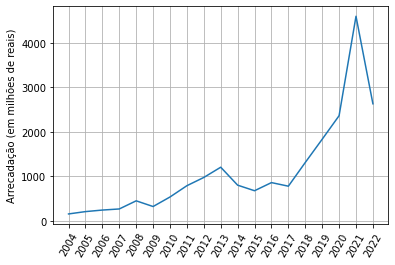

In [14]:
# Escreva seu código aqui




Tarefa 2 - Extração de bauxita por estado entre 2015 e 2021 - (3 pontos)
---------

Implemente funções para plotar um gráfico de barras que mostra a extração de bauxita (**'BAUXITA'**) por estado brasileiro entre os anos de 2015 e 2021. 

**Dica 1:** Bauxita é representada pela string 'BAUXITA' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

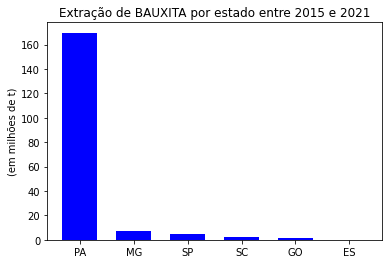

In [15]:
# Escreva seu código aqui




Tarefa 3 - Extração de ouro por estado nos últimos dez anos - (3 pontos)
---------

Implemente funções para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2011 até 2021) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

**Dica 1:** Ouro é representado pela string 'OURO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

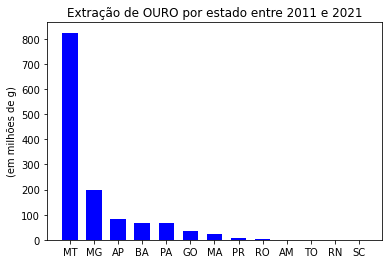

In [16]:
# Escreva seu código aqui




Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará - (3 pontos)
---------

Implemente funções para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 2003 até 2022). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

**Dica 1:** Ferro é representada pela string 'FERRO' na coluna 'Substância'.

**Dica 2:** alguns registros não possuem a quantidade comercializada. Verificar se a coluna 'QuantidadeComercializada' é diferente da string vazia ('').

**Dica 3:** a unidade de medida de alguns registros está diferente de tonelada (t). Podem ignorar esse detalhe e assumir que a unidade de medida de todos os registros é tonelada.

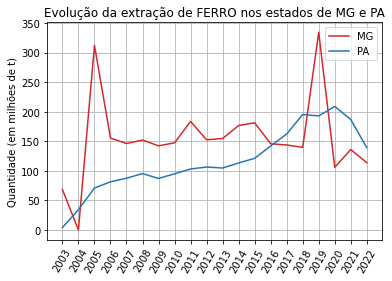

In [17]:
# Escreva seu código aqui




Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul e Minas Gerais no ano de 2021 por tipo de minério extraído - (3 pontos)
---------

Implemente funções para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2021. Utilize o mesmo código para plotar o mesmo gráfico considerando apenas o Estado de Minas Gerais.

**Dica 1:** use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

**Dica 2:** por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


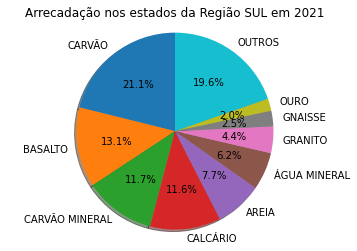

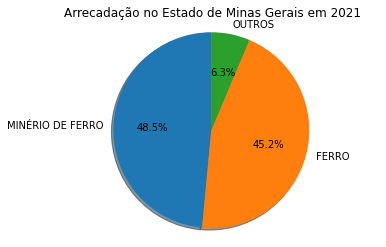

In [18]:
# Escreva seu código aqui


